1.IMPORT NECESSARY  LIBARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2.Loading Csv file to DataFrame

In [2]:
%%time
df=pd.read_csv("Analysis/Call_Volume_Trend_Analysis.csv")

Wall time: 210 ms


In [3]:
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


3.Cleaning the dataframe⬇️⬇️⬇️⬇️

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Name          83790 non-null   object 
 1   Agent_ID            83790 non-null   float64
 2   Customer_Phone_No   117988 non-null  object 
 3   Queue_Time(Secs)    117988 non-null  int64  
 4   Date_&_Time         117988 non-null  object 
 5   Time                117988 non-null  float64
 6   Time_Bucket         117988 non-null  object 
 7   Duration(hh:mm:ss)  117988 non-null  object 
 8   Call_Seconds (s)    117988 non-null  float64
 9   Call_Status         117988 non-null  object 
 10  Wrapped _By         70111 non-null   object 
 11  Ringing             117988 non-null  object 
 12  IVR _Duration       117988 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 11.7+ MB


drop Duplicates

In [5]:
df[df.duplicated()==True]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
42,NaN,NaN,87782XXXXX,16,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:16
312,NaN,NaN,96336XXXXX,120,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:14
4397,NaN,NaN,78499XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:17
4436,NaN,NaN,93589XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
4507,NaN,NaN,91779XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108162,NaN,NaN,99715XXXXX,120,1/21/2022,10.0,10_11,0:00:00,0.0,abandon,NaN,YES,0:00:14
108395,NaN,NaN,90004XXXXX,120,1/21/2022,10.0,10_11,0:00:00,0.0,abandon,NaN,YES,0:00:20
108513,NaN,NaN,84090XXXXX,120,1/21/2022,11.0,11_12,0:00:00,0.0,abandon,NaN,YES,0:00:15
108714,NaN,NaN,90099XXXXX,120,1/21/2022,11.0,11_12,0:00:00,0.0,abandon,NaN,YES,0:00:14


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.tail(1)

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
117987,Executives 58,1000058.0,83800XXXXX,5,1/23/2022,20.0,20_21,0:01:22,82.0,answered,Agent,YES,0:00:14


null % in each column

In [8]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

Wrapped _By           40.10
Agent_Name            28.41
Agent_ID              28.41
Customer_Phone_No      0.00
Queue_Time(Secs)       0.00
Date_&_Time            0.00
Time                   0.00
Time_Bucket            0.00
Duration(hh:mm:ss)     0.00
Call_Seconds (s)       0.00
Call_Status            0.00
Ringing                0.00
IVR _Duration          0.00
dtype: float64

In [9]:
df["Wrapped _By"].value_counts()

Agent          60396
AutoWrapped     9715
Name: Wrapped _By, dtype: int64

In [10]:
round(df["Call_Status"].value_counts()/len(df)*100,2)

answered    70.44
abandon     28.59
transfer     0.97
Name: Call_Status, dtype: float64

In [11]:
df[df["Call_Status"]=="abandon"]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
5,NaN,NaN,96424XXXXX,13,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:16
7,NaN,NaN,96392XXXXX,60,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:17
12,NaN,NaN,97232XXXXX,120,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:40
15,NaN,NaN,77082XXXXX,16,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:18
16,NaN,NaN,95255XXXXX,44,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117932,NaN,NaN,79813XXXXX,39,1/23/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:19
117940,NaN,NaN,98296XXXXX,5,1/23/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:22
117955,NaN,NaN,70745XXXXX,3,1/23/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:42
117960,NaN,NaN,89292XXXXX,3,1/23/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:19


4.EDA and Question's Answer

a.Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket).

In [12]:
df.groupby(['Time_Bucket'])["Call_Seconds (s)"].mean()

Time_Bucket
10_11     99.151900
11_12    118.255262
12_13    145.761901
13_14    150.530518
14_15    147.696546
15_16    170.231375
16_17    181.501309
17_18    179.808792
18_19    174.396959
19_20    145.008845
20_21    106.920257
9_10      94.090764
Name: Call_Seconds (s), dtype: float64

In [13]:
df.groupby(['Time_Bucket'])["Call_Seconds (s)"].mean().mean()

142.77953565739418

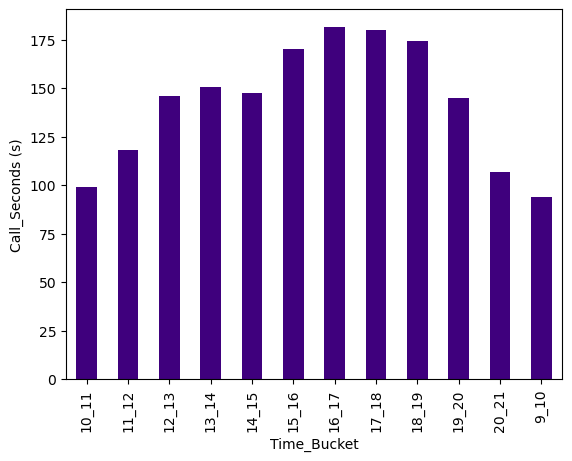

In [14]:
plt.xlabel("Time_Bucket")
plt.ylabel("Call_Seconds (s)")
df.groupby(['Time_Bucket'])["Call_Seconds (s)"].mean().plot(kind="bar",colormap='Purples_r')
plt.show()

b.Show the total volume/ number of calls coming in via charts/ graphs [Number of calls v/s Time]. You can select time in a bucket form (i.e. 1-2, 2-3, …..)

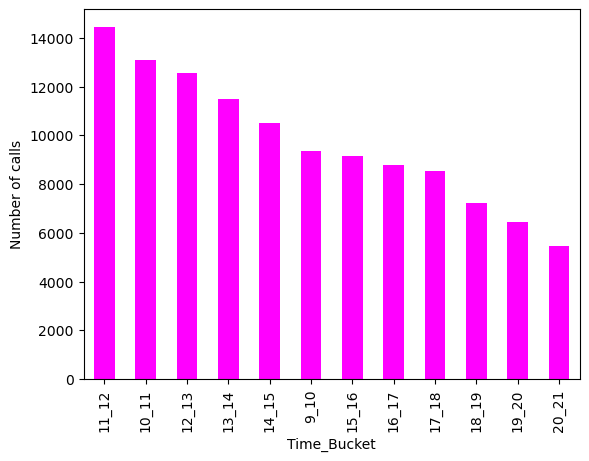

In [15]:
plt.xlabel("Time_Bucket")
plt.ylabel("Number of calls")
df["Time_Bucket"].value_counts().plot(kind="bar",colormap='spring')
plt.show()

c.As you can see current abandon rate is approximately 30%. Propose a manpower plan required during each time bucket [between 9am to 9pm] to reduce the abandon rate to 10%. (i.e. You have to calculate minimum number of agents required in each time bucket so that at least 90 calls should be answered out of 100.) 

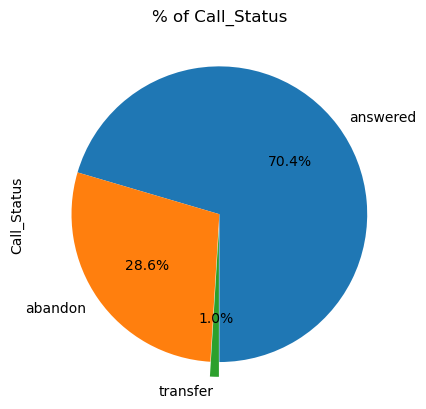

In [16]:
plt.title("% of Call_Status")
pie=round(df["Call_Status"].value_counts()/len(df)*100,2).plot(kind='pie',autopct='%.1f%%',startangle =270,explode=[0,0,0.1])
plt.show()

<AxesSubplot:xlabel='Time_Bucket', ylabel='Number of Calls'>

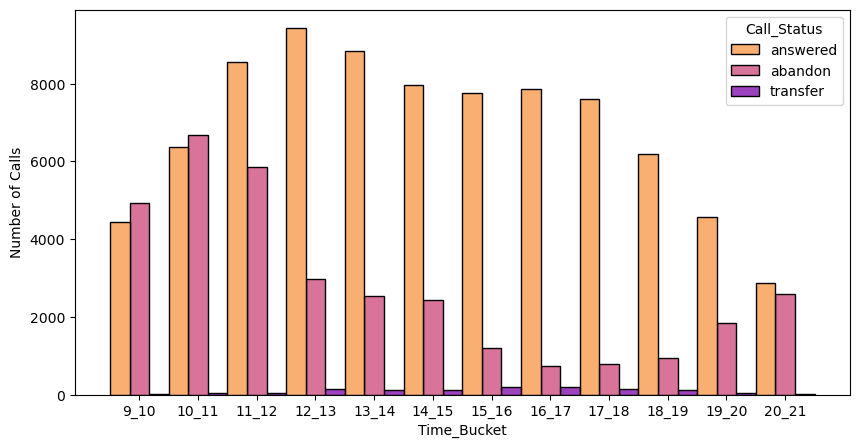

In [17]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.ylabel("Number of Calls")
sns.histplot(x=df["Time_Bucket"],hue=df['Call_Status'],multiple="dodge",palette='plasma_r')

Assumption: An agent work for 6 days a week; On an average total unplanned leaves per agent is 4 days a month; An agent total working hrs is 9 Hrs out of which 1.5 Hrs goes into lunch and snacks in the office. On average an agent occupied for 60% of his total actual working Hrs (i.e 60% of 7.5 Hrs) on call with customers/ users. Total days in a month is 30 days.

Calculation of Number of Agents required:

In [18]:
# sum of total Call_seconds (in sec) by agents in 23 days
call_sec_total=df['Call_Seconds (s)'].sum()
call_sec_total

16463119.0

In [19]:
# average call_seconds(in hrs) in a day
avg_call_time_per_day=call_sec_total/(60*60*23)
avg_call_time_per_day

198.82993961352656

In [20]:
# number of agents working so that answered call are 70.4%
num_agents_working=round(avg_call_time_per_day/4.5)
num_agents_working

44

In [21]:
# number of agents required so that abondan rate is 10% or answered call is 90%
num_agents_req=round((num_agents_working*90)/70.4)
num_agents_req

56

Number of agents in each Time_Bucket

In [22]:
prct_of_calls_time_bucket=round(df.groupby('Time_Bucket')['Call_Seconds (s)'].count()/len(df['Call_Seconds (s)'])*100)
prct_of_calls_time_bucket

Time_Bucket
10_11    11.0
11_12    12.0
12_13    11.0
13_14    10.0
14_15     9.0
15_16     8.0
16_17     8.0
17_18     7.0
18_19     6.0
19_20     6.0
20_21     5.0
9_10      8.0
Name: Call_Seconds (s), dtype: float64

In [23]:
num_of_agents_time_bucket=round(prct_of_calls_time_bucket*56/100)
num_of_agents_time_bucket.astype('int32')

Time_Bucket
10_11    6
11_12    7
12_13    6
13_14    6
14_15    5
15_16    4
16_17    4
17_18    4
18_19    3
19_20    3
20_21    3
9_10     4
Name: Call_Seconds (s), dtype: int32

In [24]:
df['Agent_Name'].nunique()

65

In [25]:
num_of_agents_time_bucket.sum()

55.0

d.Let’s say customers also call this ABC insurance company in night but didn’t get answer as there are no agents to answer, this creates a bad customer experience for this Insurance company. Suppose every 100 calls that customer made during 9 Am to 9 Pm, customer also made 30 calls in night between interval [9 Pm to 9 Am] and distribution of those 30 calls are as follows:

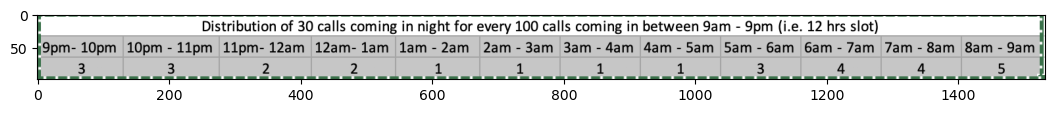

In [26]:
import matplotlib.image as mpimg
# Read Images
img = mpimg.imread('Analysis/ABC_project_asset.png')
# Output Images
plt.figure(figsize=(13,1))    
plt.imshow(img)

In [27]:
d=len(df)/23
d,round((30*d)/100)

(5089.0, 1527)

In [28]:
# additonal_call_time(in hour) per night (when abondon % is approx 30%)
additional_call_time_hrs=round(avg_call_time_per_day*30/100)
additional_call_time_hrs

60

In [29]:
# additional_call_time(in hour) per night (when abondon % is 10% or answered call % is 90%)
additional_call_time_hrs_req=additional_call_time_hrs*90/70.4
additional_call_time_hrs_req

76.70454545454545

In [30]:
# number of agents required at night so that abondon % is 10%
num_agents_req=round(additional_call_time_hrs_req/4.5)
num_agents_req

17

Creating DataFrame for time bucket night

In [31]:
dict={"Time_Bucket":["9pm-10pm","10pm-11pm","11pm-12am","12am-1am","1am-2am",
                     "2am-3am","3am-4am","4am-5am","5am-6am","6am-7am",
                     "7am-8am","8am-9am"],
     "Number_of_calls":[3,3,2,2,1,1,1,1,3,4,4,5]}
df_tb_night=pd.DataFrame(dict)
df_tb_night

,Time_Bucket,Number_of_calls
0,9pm-10pm,3
1,10pm-11pm,3
2,11pm-12am,2
3,12am-1am,2
4,1am-2am,1
5,2am-3am,1
6,3am-4am,1
7,4am-5am,1
8,5am-6am,3
9,6am-7am,4


In [32]:
df_tb_night["percentage_of_calls"]=(df_tb_night["Number_of_calls"]/30)*100

In [33]:
# number of agents working in each time bucket
df_tb_night["num_of_agents_req"]=round((df_tb_night["percentage_of_calls"])*num_agents_req/100)

In [34]:
df_tb_night

,Time_Bucket,Number_of_calls,percentage_of_calls,num_of_agents_req
0,9pm-10pm,3,10.000000,2.0
1,10pm-11pm,3,10.000000,2.0
2,11pm-12am,2,6.666667,1.0
3,12am-1am,2,6.666667,1.0
4,1am-2am,1,3.333333,1.0
5,2am-3am,1,3.333333,1.0
6,3am-4am,1,3.333333,1.0
7,4am-5am,1,3.333333,1.0
8,5am-6am,3,10.000000,2.0
9,6am-7am,4,13.333333,2.0


In [35]:
df_tb_night['num_of_agents_req']=df_tb_night['num_of_agents_req'].astype('int32')

In [36]:
df_tb_night[['Time_Bucket','num_of_agents_req']]

,Time_Bucket,num_of_agents_req
0,9pm-10pm,2
1,10pm-11pm,2
2,11pm-12am,1
3,12am-1am,1
4,1am-2am,1
5,2am-3am,1
6,3am-4am,1
7,4am-5am,1
8,5am-6am,2
9,6am-7am,2
